In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
 
    

In [2]:
# read the dataset
data = pd.read_csv('/Users/vedantpramodwagh/Documents/Data Glacier/Healthcare_dataset.csv')
data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [3]:
data.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
# check the missing value
data.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [5]:
#check for the duplicate value
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Length: 3424, dtype: bool

In [6]:
# check for the outlier
from sklearn.ensemble import IsolationForest
a=data.select_dtypes(include=('int64','float64')).columns

In [7]:
# intilaize isloationforest
iso= IsolationForest(contamination=0.1, random_state =42)

In [8]:
# fit the model
data['anomaly']=iso.fit_predict(data[a])

In [9]:
# Filter out the anomalies
data_cleaned = data[data['anomaly']==1]
data_cleaned1 = data_cleaned.drop(columns=['anomaly'])
data_cleaned1


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [10]:
#Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

# select the numericals columns

num_cols = data.select_dtypes(include=('int64','float64')).columns

# Intilaize the LOf 

lof = LocalOutlierFactor(contamination =0.1, n_neighbors=20)

# fit the model and predict the outlier

data['anomaly'] = lof.fit_predict(data[num_cols])

# filter out the anomalies

data_cleaned = data[data['anomaly'] ==1]

data_cleaned = data_cleaned.drop(columns=['anomaly'])

In [52]:
data_cleaned

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [11]:
# EDA
# distribution of Categorical column
cat_col = data.select_dtypes(include=('object')).columns
for col in cat_col:
    print("Distribution of {col}:\n",data[col].value_counts(),"\n")

Distribution of {col}:
 Ptid
P1       1
P2275    1
P2277    1
P2278    1
P2279    1
        ..
P1145    1
P1146    1
P1147    1
P1148    1
P3424    1
Name: count, Length: 3424, dtype: int64 

Distribution of {col}:
 Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64 

Distribution of {col}:
 Gender
Female    3230
Male       194
Name: count, dtype: int64 

Distribution of {col}:
 Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64 

Distribution of {col}:
 Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64 

Distribution of {col}:
 Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64 

Distribution of {col}:
 Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64 

Distribution of {col}:
 Ntm_Specia

/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


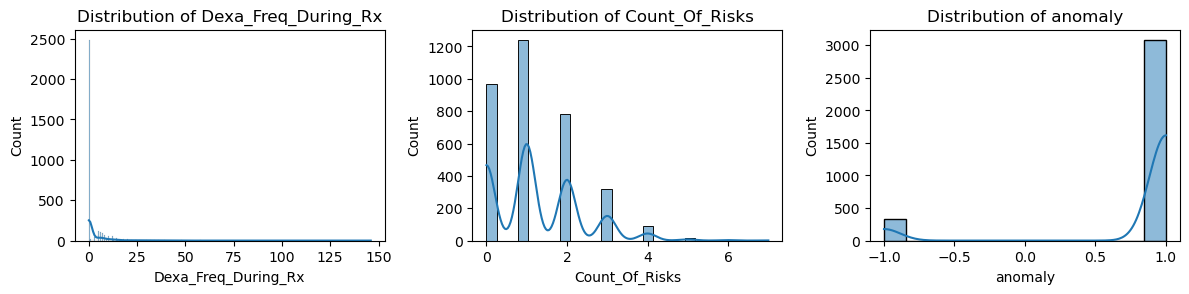

In [12]:
# visualize the numericals columns
nums_cols = data.select_dtypes(include=('int64','float64')).columns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(nums_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


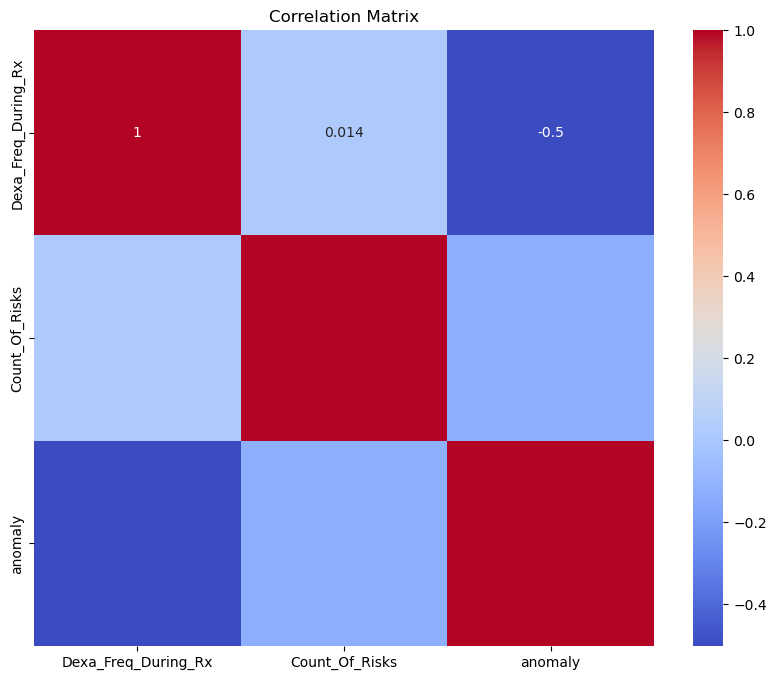

In [13]:
# correlation matrix 
corr_mat = data[nums_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


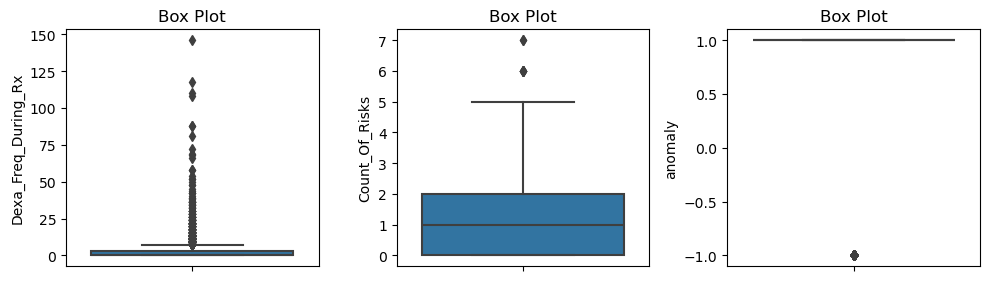

In [14]:
# Box plot to visulaize the outlier detection
plt.figure(figsize=(10,8))
for i, col in enumerate(nums_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=data[col])
    plt.title('Box Plot')
plt.tight_layout()
plt.show()

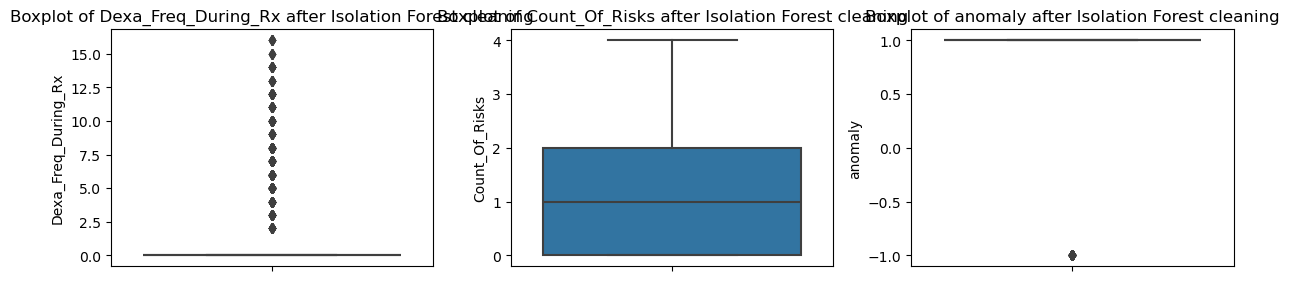

In [16]:
# Initialize Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict outliers
data['anomaly_if'] = iso.fit_predict(data[num_cols])

# Filter out the anomalies
data_cleaned_if = data[data['anomaly_if'] == 1]
data_cleaned_if = data_cleaned_if.drop(columns=['anomaly_if'])

# Visualize the effect of outlier removal using Isolation Forest
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_cleaned_if[col])
    plt.title(f'Boxplot of {col} after Isolation Forest cleaning')
plt.tight_layout()
plt.show()


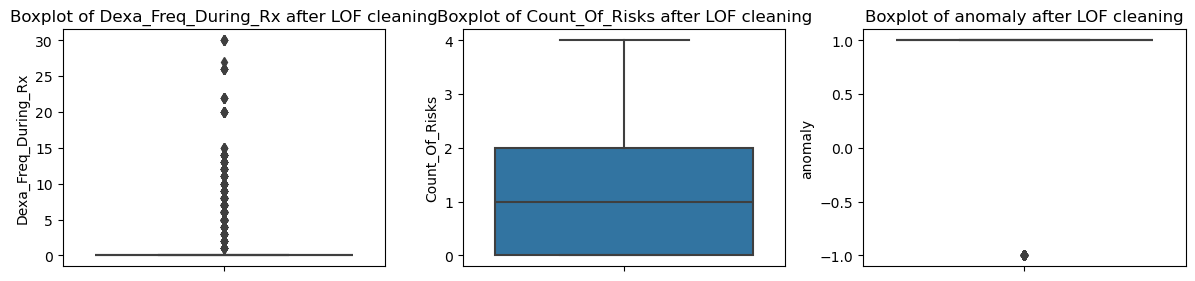

In [17]:
# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(contamination=0.1, n_neighbors=20)

# Fit the model and predict outliers
data['anomaly_lof'] = lof.fit_predict(data[num_cols])

# Filter out the anomalies
data_cleaned_lof = data[data['anomaly_lof'] == 1]
data_cleaned_lof = data_cleaned_lof.drop(columns=['anomaly_lof'])

# Visualize the effect of outlier removal using LOF
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_cleaned_lof[col])
    plt.title(f'Boxplot of {col} after LOF cleaning')
plt.tight_layout()
plt.show()

In [21]:
# Output results
results = {
    "missing_values": data.isna().sum(),
    "duplicate_values": data.duplicated,
}

print(results)

{'missing_values': Ptid                    0
Persistency_Flag        0
Gender                  0
Race                    0
Ethnicity               0
                       ..
Risk_Recurring_Falls    0
Count_Of_Risks          0
anomaly                 0
anomaly_if              0
anomaly_lof             0
Length: 72, dtype: int64, 'duplicate_values': <bound method DataFrame.duplicated of        Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic